In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from ipywidgets import Audio   ##we also use IPython.display
import warnings
warnings.filterwarnings("ignore")
from keras import utils

Load Dataset

In [3]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk('TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print("Dataset is updated.")

Dataset is updated.


In [4]:
len(paths)

2800

In [5]:
paths[15:600:60]

['TESS Toronto emotional speech set data\\OAF_angry\\OAF_cause_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_kick_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_red_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_witch_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_disgust\\OAF_hall_disgust.wav',
 'TESS Toronto emotional speech set data\\OAF_disgust\\OAF_pad_disgust.wav',
 'TESS Toronto emotional speech set data\\OAF_disgust\\OAF_tire_disgust.wav',
 'TESS Toronto emotional speech set data\\OAF_Fear\\OAF_doll_fear.wav',
 'TESS Toronto emotional speech set data\\OAF_Fear\\OAF_luck_fear.wav',
 'TESS Toronto emotional speech set data\\OAF_Fear\\OAF_shout_fear.wav']

In [6]:
labels[500:2000:250]

['fear', 'happy', 'ps', 'sad', 'angry', 'disgust']

In [7]:
df=pd.DataFrame()
df['Speech'] = paths
df['Label'] = labels
df.sample(5)

,Speech,Label
2099,TESS Toronto emotional speech set data\TESS To...,happy
1229,TESS Toronto emotional speech set data\OAF_Sad...,sad
264,TESS Toronto emotional speech set data\OAF_dis...,disgust
2583,TESS Toronto emotional speech set data\TESS To...,ps
2694,TESS Toronto emotional speech set data\TESS To...,sad


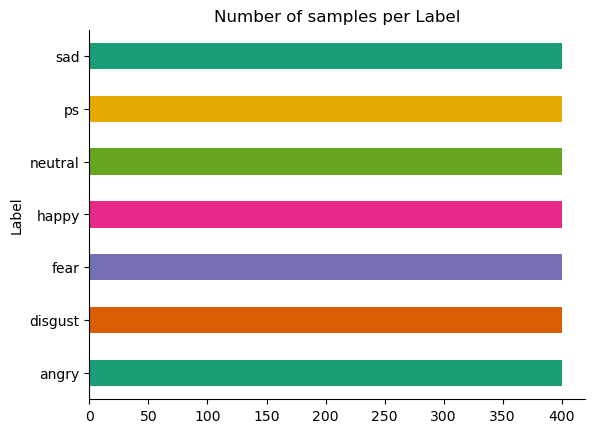

In [8]:
df.groupby('Label').size().plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))
plt.title('Number of samples per Label')
plt.gca().spines[['top', 'right']].set_visible(False)

In [9]:
df['Label'].value_counts()

Label
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

In [10]:
df['Label_count'] = df['Label'].value_counts()
df.head()

,Speech,Label,Label_count
0,TESS Toronto emotional speech set data\OAF_ang...,angry,NaN
1,TESS Toronto emotional speech set data\OAF_ang...,angry,NaN
2,TESS Toronto emotional speech set data\OAF_ang...,angry,NaN
3,TESS Toronto emotional speech set data\OAF_ang...,angry,NaN
4,TESS Toronto emotional speech set data\OAF_ang...,angry,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Speech       2800 non-null   object 
 1   Label        2800 non-null   object 
 2   Label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


In [12]:
df

,Speech,Label,Label_count
0,TESS Toronto emotional speech set data\OAF_ang...,angry,NaN
1,TESS Toronto emotional speech set data\OAF_ang...,angry,NaN
2,TESS Toronto emotional speech set data\OAF_ang...,angry,NaN
3,TESS Toronto emotional speech set data\OAF_ang...,angry,NaN
4,TESS Toronto emotional speech set data\OAF_ang...,angry,NaN
...,...,...,...
2795,TESS Toronto emotional speech set data\TESS To...,sad,NaN
2796,TESS Toronto emotional speech set data\TESS To...,sad,NaN
2797,TESS Toronto emotional speech set data\TESS To...,sad,NaN
2798,TESS Toronto emotional speech set data\TESS To...,sad,NaN


In [13]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=22)
    librosa.display.waveshow(data, sr=sr, color="purple", alpha= 0.8)
    #plt.grid(linestyle="-")
    plt.show()

def spectogram(data,sr, emotion):
    plt.figure(figsize=(10,5))
    plt.title(emotion, size=20)
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    librosa.display.specshow(xdb, sr=sr, x_axis="time", y_axis="hz", cmap="viridis")
    plt.colorbar(format = "%+2.f DB")
    plt.show()

In [14]:
df['Label'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad'],
      dtype=object)

In [15]:
df['Speech'].nunique()

2800

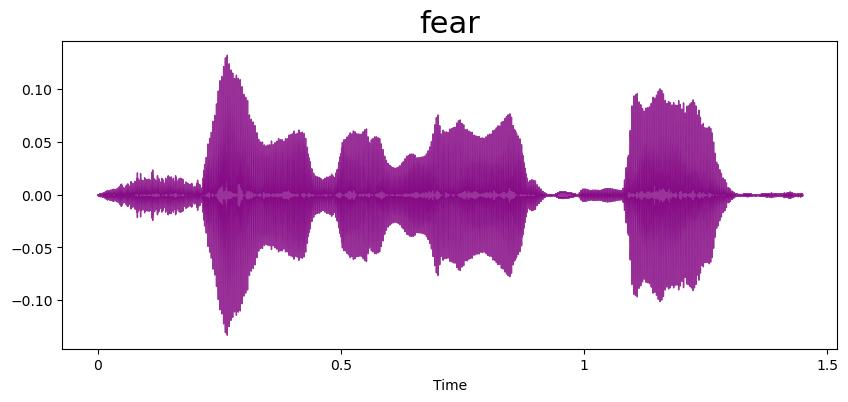

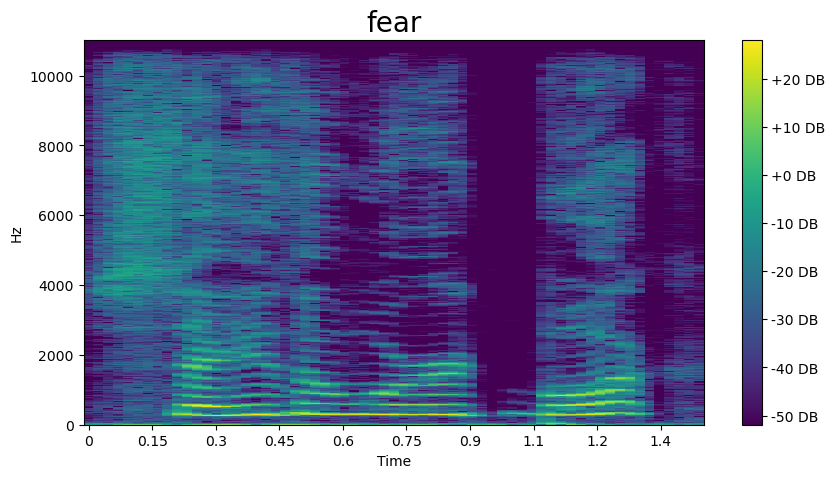

Audio(value=b'RIFFb\x14\x01\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00^_\x00\x00\xbc\xbe\x00\x00\x02\x00\x10\…

In [17]:
emotion="fear"
path=np.array(df['Speech'][df['Label']==emotion])[9]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio.from_file(path)

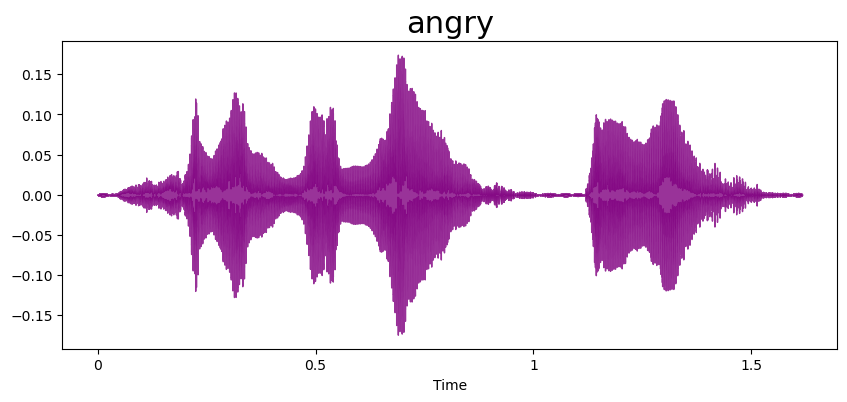

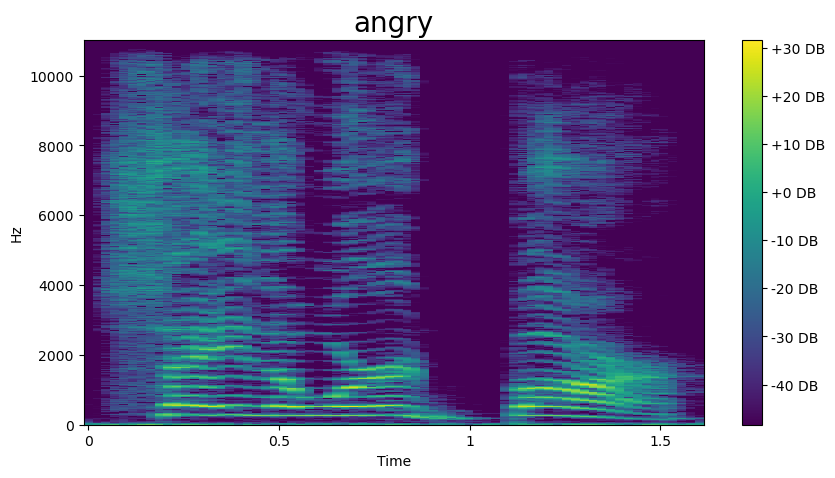

Audio(value=b'RIFF\x884\x01\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00^_\x00\x00\xbc\xbe\x00\x00\x02\x00\x10\…

In [18]:
emotion="angry"
path=np.array(df['Speech'][df["Label"]==emotion])[1]
data, sampling_rate=librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio.from_file(path)

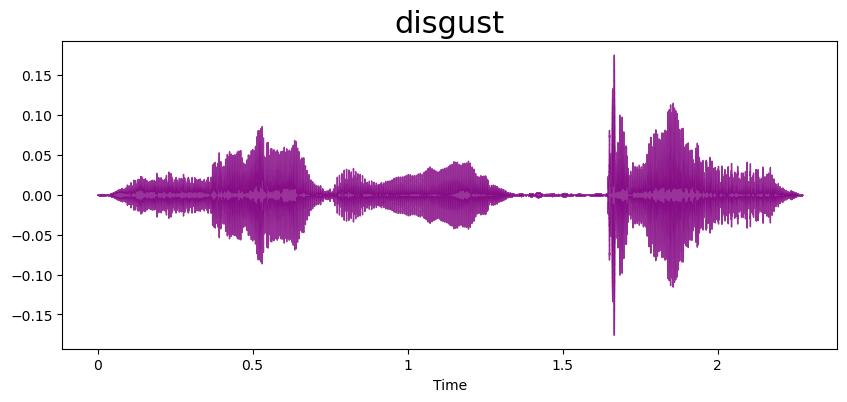

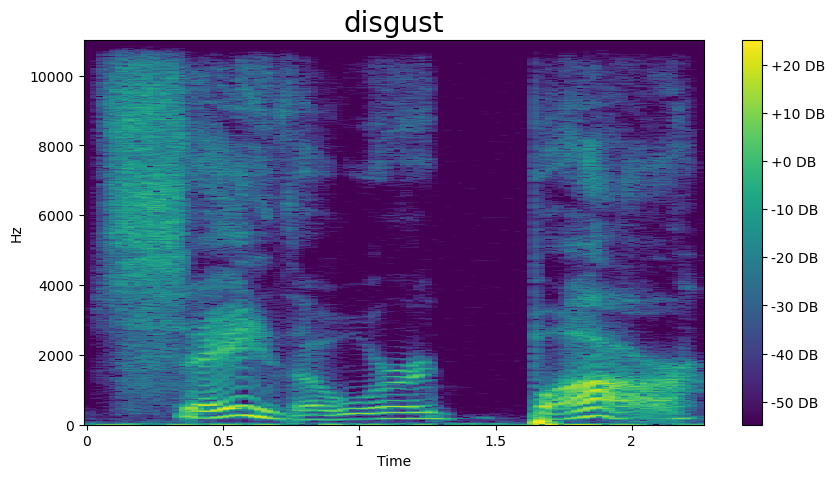

Audio(value=b'RIFF\xb8\xb1\x01\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00^_\x00\x00\xbc\xbe\x00\x00\x02\x00\x…

In [19]:
emotion="disgust"
path=np.array(df["Speech"][df['Label']==emotion])[1]
data, sampling_rate= librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio.from_file(path)

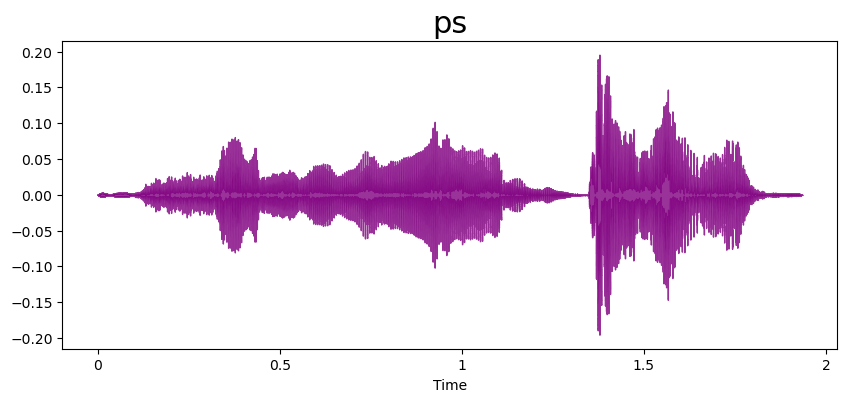

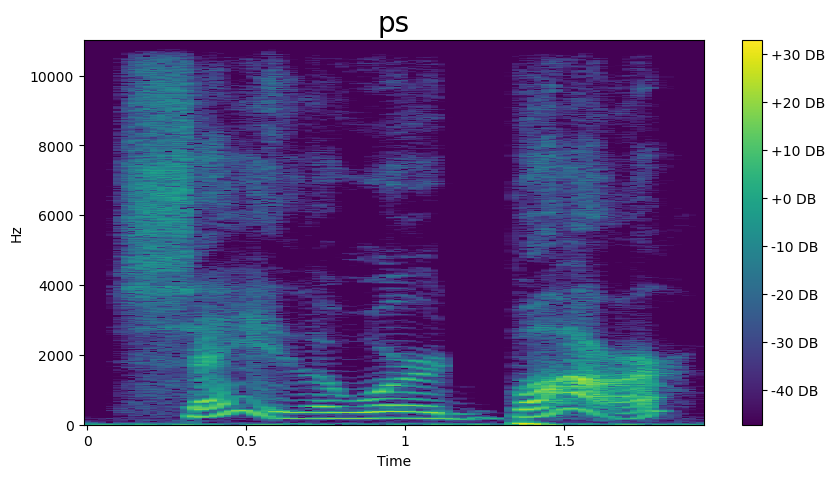

Audio(value=b'RIFF&q\x01\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00^_\x00\x00\xbc\xbe\x00\x00\x02\x00\x10\x00…

In [20]:
emotion = 'ps'
path=np.array(df['Speech'][df['Label']==emotion])[1]
data, sampling_rate=librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio.from_file(path)

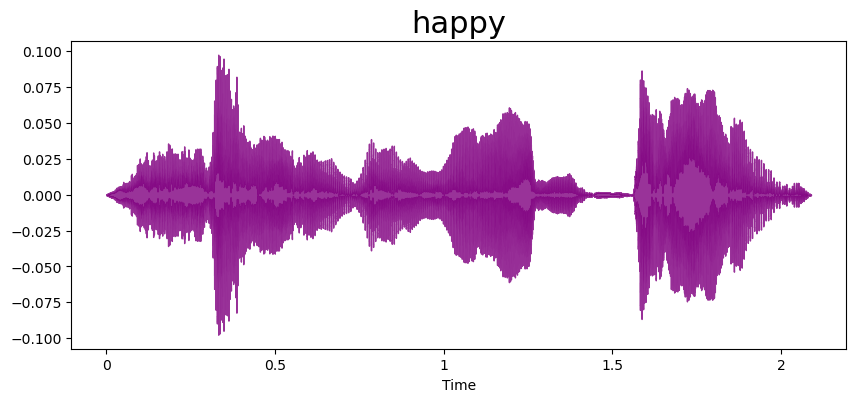

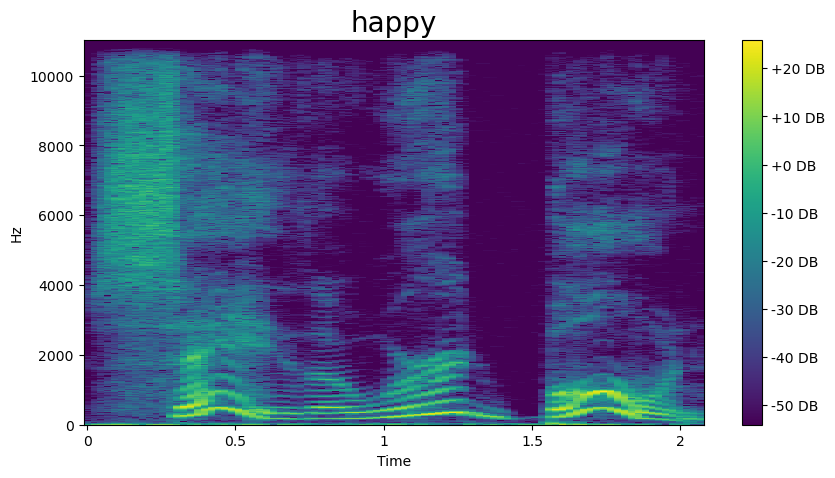

Audio(value=b'RIFF\xb4\x8e\x01\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00^_\x00\x00\xbc\xbe\x00\x00\x02\x00\x…

In [21]:
emotion="happy"
path=np.array(df['Speech'][df['Label']==emotion])[8]
data, sampling_rate=librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio.from_file(path)

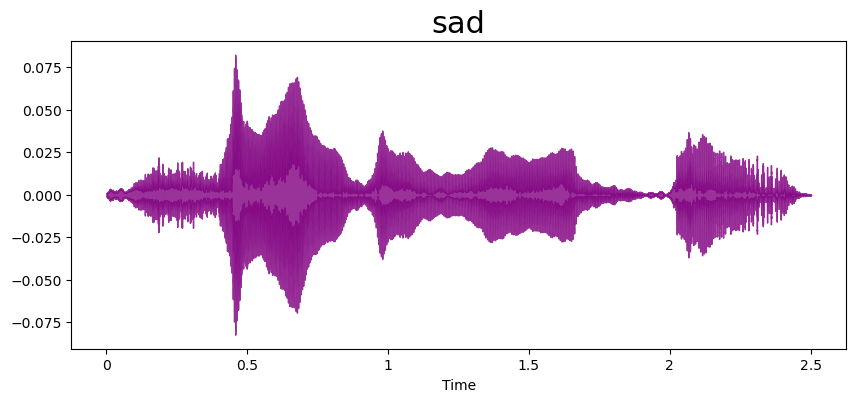

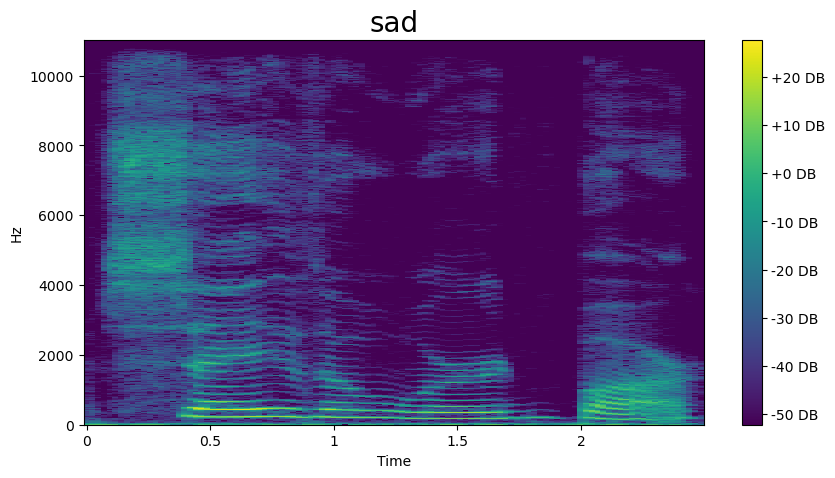

Audio(value=b'RIFF\\\xdd\x01\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00^_\x00\x00\xbc\xbe\x00\x00\x02\x00\x10…

In [22]:
emotion='sad'
path=np.array(df['Speech'][df['Label']==emotion])[1]
data, sampling_rate=librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio.from_file(path)

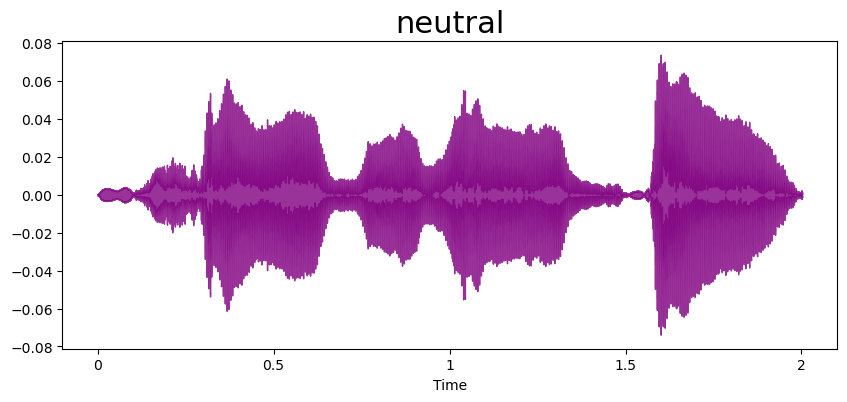

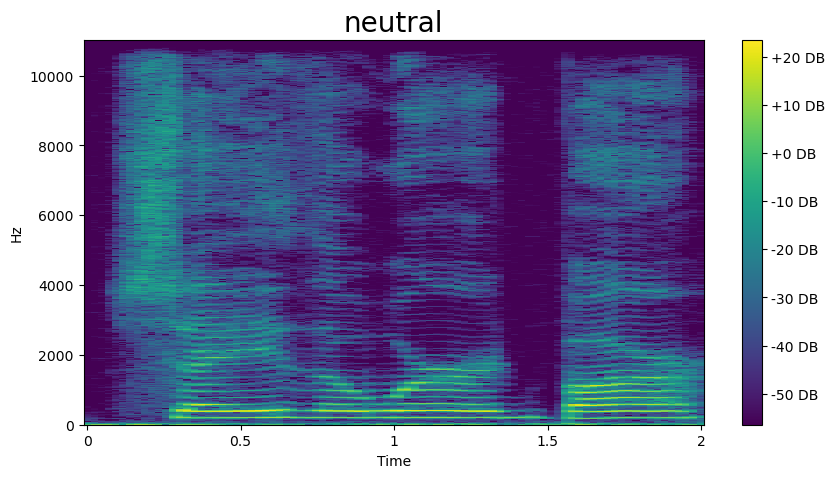

Audio(value=b'RIFF\x08~\x01\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00^_\x00\x00\xbc\xbe\x00\x00\x02\x00\x10\…

In [23]:
emotion='neutral'
path=np.array(df['Speech'][df['Label']==emotion])[1]
data, sampling_rate=librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio.from_file(path)

In [24]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [25]:
extract_mfcc(df['Speech'][0])

array([-3.9698621e+02,  7.7440536e+01, -1.9592791e+01, -2.1666689e+01,
       -2.1127567e+00,  1.0075363e+01, -2.0366707e+01, -6.0924492e+00,
       -7.2122831e+00, -5.5736601e-01, -1.8325533e+00,  2.0210160e-01,
        7.2755092e-01,  1.3177377e+00,  2.8863373e+00,  2.8557909e+00,
       -4.7129216e+00, -4.4365101e+00, -1.6211591e+00, -1.0239839e+01,
       -7.5512629e+00, -1.7968802e+00, -7.0376525e+00,  9.4365835e+00,
        8.3558550e+00,  2.1712360e+01,  1.9216991e+01,  2.0348927e+01,
        1.3413366e+01,  8.3391724e+00,  3.9472201e-01,  5.1113148e+00,
        9.5687389e+00,  5.4548678e+00,  2.5099638e+00, -1.8239071e+00,
        4.8689623e+00,  9.3139238e+00,  2.0891500e+00, -1.9064913e+00],
      dtype=float32)

In [26]:
X_mfcc = df['Speech'].apply(lambda x: extract_mfcc(x))

In [27]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.65600866, -32.74544, ...
2       [-429.79196, 46.124, 1.5550478, -0.21709493, 2...
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.8654995, 16.092943, 8...
                              ...                        
2795    [-553.2201, 89.83577, 27.215466, 16.407124, 19...
2796    [-589.23676, 96.20407, 36.96118, 15.014446, 28...
2797    [-533.41815, 85.43242, 27.791998, 19.307178, 2...
2798    [-548.6142, 110.16424, 31.91024, 12.572517, 22...
2799    [-549.2962, 102.374565, 32.268833, 26.261614, ...
Name: Speech, Length: 2800, dtype: object

In [28]:
X = [x for x in X_mfcc]
X = np.array(X)

In [29]:
X.shape

(2800, 40)

In [30]:
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [31]:
from sklearn.preprocessing import OneHotEncoder
y=OneHotEncoder()
y=y.fit_transform(df[['Label']])

In [32]:
y = y.toarray()

In [33]:
y.shape

(2800, 7)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2, random_state=42)

LSTM Model

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
model  = Sequential([
    LSTM(128, return_sequences = False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['Accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,127 (301.28 KB)

 Trainable params: 77,127 (301.28 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - Accuracy: 0.2754 - loss: 1.7321 - val_Accuracy: 0.6786 - val_loss: 0.9700
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - Accuracy: 0.6287 - loss: 0.9393 - val_Accuracy: 0.8103 - val_loss: 0.5307
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - Accuracy: 0.7878 - loss: 0.5599 - val_Accuracy: 0.9196 - val_loss: 0.3037
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - Accuracy: 0.8725 - loss: 0.3820 - val_Accuracy: 0.9286 - val_loss: 0.2732
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - Accuracy: 0.9151 - loss: 0.2656 - val_Accuracy: 0.9598 - val_loss: 0.1425
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - Accuracy: 0.9361 - loss: 0.2018 - val_Accuracy: 0.9353 - val_loss: 0.2081
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - Accuracy: 0.9603 - loss: 0.1520 - val_Accuracy: 0.9710 - val_loss: 0.0951
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - Accuracy: 0.9595 - loss: 0.1208 - val_Accuracy: 0.9665 - v

Plot Result

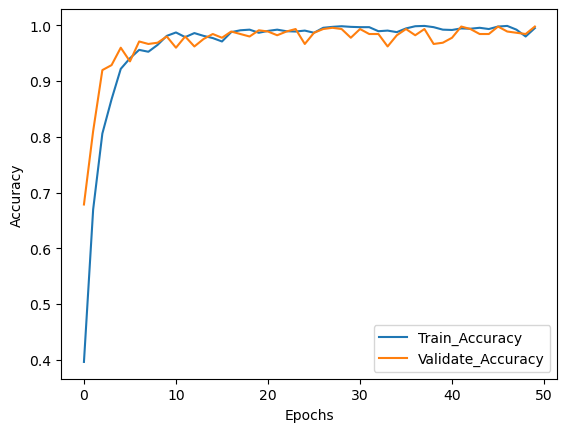

In [37]:
epochs=list(range(50))
acc=history.history['Accuracy']
val_acc=history.history['val_Accuracy']
plt.plot(epochs,acc,label='Train_Accuracy')
plt.plot(epochs,val_acc,label='Validate_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

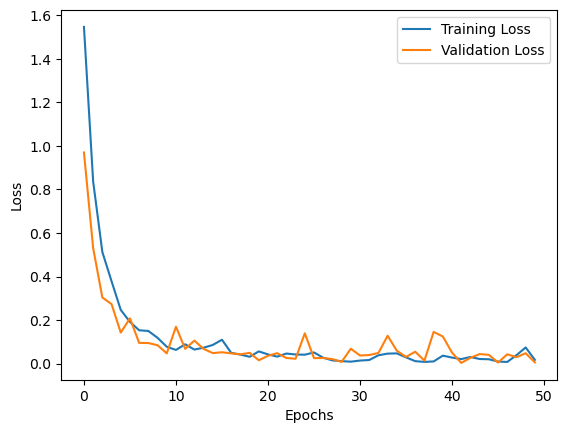

In [38]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [39]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [40]:
from sklearn.metrics import confusion_matrix, classification_report

In [41]:
conf_mat = confusion_matrix(y_val_classes, y_pred_classes)
print(conf_mat)

[[74  0  0  0  0  0  0]
 [ 0 78  0  0  0  0  0]
 [ 0  0 89  0  0  0  0]
 [ 0  0  0 76  0  1  0]
 [ 0  0  0  0 73  0  0]
 [ 0  0  0  0  0 87  0]
 [ 0  0  0  0  0  0 82]]


In [42]:
target_names = ["angry",'sad','ps','disgust','fear','neutral','happy']
c = classification_report(y_val_classes,y_pred_classes,target_names=target_names)
print(c)

              precision    recall  f1-score   support

       angry       1.00      1.00      1.00        74
         sad       1.00      1.00      1.00        78
          ps       1.00      1.00      1.00        89
     disgust       1.00      0.99      0.99        77
        fear       1.00      1.00      1.00        73
     neutral       0.99      1.00      0.99        87
       happy       1.00      1.00      1.00        82

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560



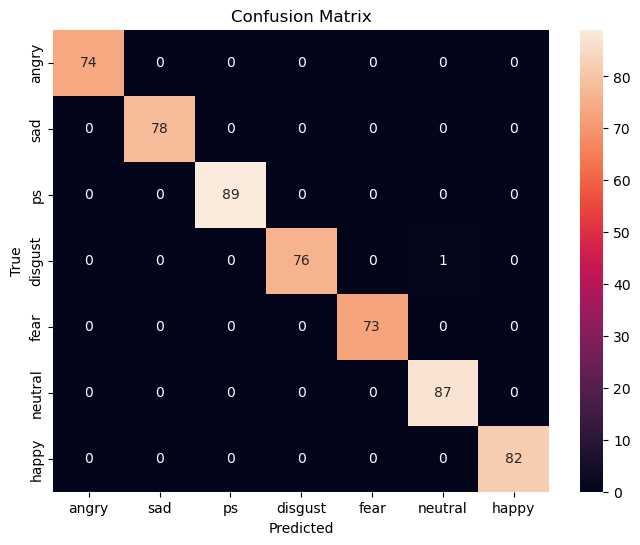

In [43]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True,fmt='d',xticklabels=target_names,yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel('True')
plt.show()